In [1]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Carregar seu arquivo
df = pd.read_csv('dados_teste.csv')

# Mapear nomes mais significativos
mapa_produtos = {
    'A': 'Produto Econômico',
    'B': 'Produto Intermediário',
    'C': 'Produto Premium',
    'D': 'Produto de Luxo',
    'E': 'Produto Inovador'
}

df['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

# Selecionar colunas numéricas
X = df[['Qualidade', 'Preço', 'Design']]

# Calcular a matriz de distâncias Euclidianas
dist_matrix = pdist(X, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

# Colocar em um DataFrame
produtos = df['Produto Nomeado'].values
df_distancias = pd.DataFrame(dist_matrix_square, index=produtos, columns=produtos)

# Salvar como CSV para importar no Jamovi
df_distancias.to_csv('matriz_distancias_jamovi.csv')

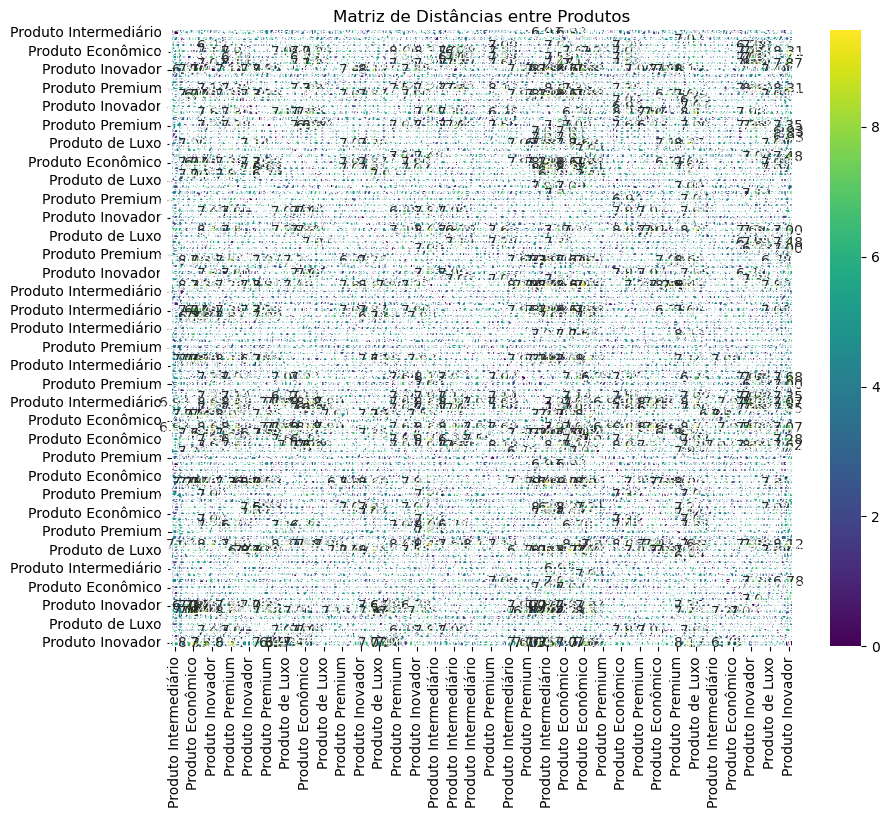

In [2]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar seu arquivo
df = pd.read_csv('dados_teste.csv')

# Mapear nomes mais significativos
mapa_produtos = {
    'A': 'Produto Econômico',
    'B': 'Produto Intermediário',
    'C': 'Produto Premium',
    'D': 'Produto de Luxo',
    'E': 'Produto Inovador'
}

df['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

# Selecionar colunas numéricas
X = df[['Qualidade', 'Preço', 'Design']]

# Calcular a matriz de distâncias Euclidianas
dist_matrix = pdist(X, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

# Colocar em um DataFrame
produtos = df['Produto Nomeado'].values
df_distancias = pd.DataFrame(dist_matrix_square, index=produtos, columns=produtos)

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_distancias, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriz de Distâncias entre Produtos')
plt.show()

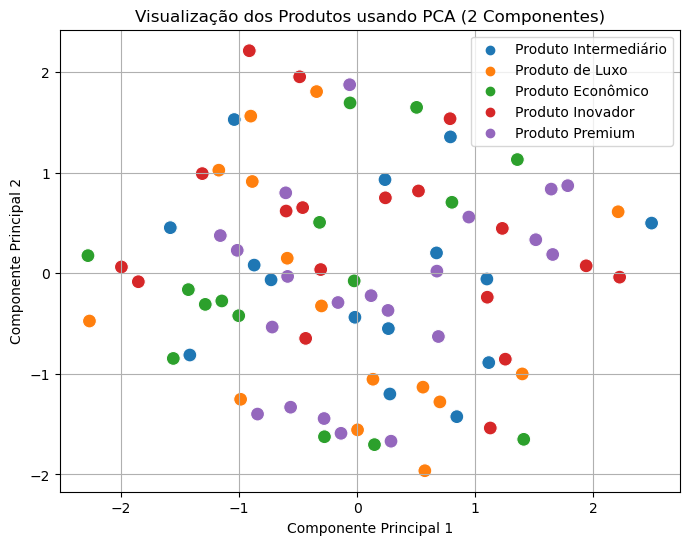

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar seu arquivo
df = pd.read_csv('dados_teste.csv')

# Mapear nomes mais significativos
mapa_produtos = {
    'A': 'Produto Econômico',
    'B': 'Produto Intermediário',
    'C': 'Produto Premium',
    'D': 'Produto de Luxo',
    'E': 'Produto Inovador'
}

df['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

# Selecionar colunas numéricas
X = df[['Qualidade', 'Preço', 'Design']]

# Padronizar os dados (importante para o PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o PCA para reduzir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os resultados do PCA
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Produto Nomeado'] = df['Produto Nomeado'].values

# Visualizar os resultados do PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Produto Nomeado', data=df_pca, s=100)
plt.title('Visualização dos Produtos usando PCA (2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import pandas as pd

# Carregar seu arquivo
df = pd.read_csv('dados_teste.csv')

# Mapear nomes mais significativos
mapa_produtos = {
    'A': 'Produto Econômico',
    'B': 'Produto Intermediário',
    'C': 'Produto Premium',
    'D': 'Produto de Luxo',
    'E': 'Produto Inovador'
}

df['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

# Agrupar por 'Produto Nomeado' e calcular a média das colunas numéricas
df_media_por_categoria = df.groupby('Produto Nomeado')[['Qualidade', 'Preço', 'Design']].mean()

# Exibir a matriz resultante
print(df_media_por_categoria)

                       Qualidade     Preço    Design
Produto Nomeado                                     
Produto Econômico       6.823529  5.588235  7.470588
Produto Inovador        5.950000  5.450000  7.050000
Produto Intermediário   6.666667  5.619048  6.761905
Produto Premium         6.600000  6.160000  6.800000
Produto de Luxo         7.000000  5.529412  7.117647


In [6]:
import pandas as pd

# Carregar a matriz original
df = pd.read_csv('matriz_distancias_jamovi.csv', index_col=0)

# Definir as categorias principais
categorias_principais = [
    'Produto Intermediário',
    'Produto de Luxo',
    'Produto Econômico',
    'Produto Inovador',
    'Produto Premium'
]

# Filtrar a matriz para as categorias principais
matriz_reduzida = df.loc[categorias_principais, categorias_principais]

# Salvar a matriz reduzida
matriz_reduzida.to_csv('matriz_reduzida.csv')

In [7]:
matriz_reduzida = pd.read_csv("matriz_reduzida.csv")
matriz_reduzida

,Unnamed: 0,Produto Intermediário,Produto de Luxo,Produto Econômico,Produto Inovador,Produto Premium
0,Produto Intermediário,0.000000,5.099020,4.123106,5.000000,2.236068
1,Produto Intermediário,4.242641,4.000000,6.403124,4.123106,4.582576
2,Produto Intermediário,1.414214,4.898979,3.605551,4.582576,3.000000
3,Produto Intermediário,1.414214,4.898979,3.605551,4.582576,3.000000
4,Produto Intermediário,3.000000,5.385165,6.324555,5.477226,3.741657
...,...,...,...,...,...,...
95,Produto Premium,4.123106,5.385165,4.242641,6.000000,2.000000
96,Produto Premium,3.741657,2.449490,4.358899,3.000000,3.000000
97,Produto Premium,1.732051,5.000000,5.099020,5.099020,2.449490
98,Produto Premium,3.000000,3.000000,3.464102,2.449490,3.741657


In [9]:
import pandas as pd

# Lê o CSV (ajuste o caminho)
df = pd.read_csv("matriz_distancias_jamovi.csv", index_col=0)

# Agrupa por categorias únicas (exemplo simplificado)
categorias_unicas[
    'Produto Intermediário',
    'Produto de Luxo',
    'Produto Econômico',
    'Produto Inovador',
    'Produto Premium'
] = df.columns.unique()
matriz_final = pd.DataFrame(index=categorias_unicas, columns=categorias_unicas)

# Preenche a matriz (usando o primeiro valor encontrado)
for i in categorias_unicas:
    for j in categorias_unicas:
        if i == j:
            matriz_final.loc[i, j] = 0.0
        else:
            matriz_final.loc[i, j] = df.loc[i, j]

# Salva em CSV
matriz_final.to_csv("matriz_distancia_formatada.csv")

TypeError: Index does not support mutable operations

In [10]:
import pandas as pd

# Lista das categorias principais (exatamente como você definiu)
categorias_principais = [
    'Produto Intermediário',
    'Produto de Luxo',
    'Produto Econômico',
    'Produto Inovador',
    'Produto Premium'
]

# Lê o CSV original (substitua "seu_arquivo.csv" pelo seu arquivo)
df = pd.read_csv("matriz_distancias_jamovi.csv", index_col=0)

# Passo 1: Filtra as linhas do DataFrame para manter apenas as categorias principais
# (Isso garante que só usaremos as linhas onde o índice está em 'categorias_principais')
df_filtrado_linhas = df[df.index.isin(categorias_principais)]

# Passo 2: Filtra as colunas para manter apenas as categorias principais
# (Isso remove colunas repetidas ou não listadas em 'categorias_principais')
df_filtrado = df_filtrado_linhas[categorias_principais]

# Passo 3: Garante que a diagonal principal seja zero
for categoria in categorias_principais:
    df_filtrado.loc[categoria, categoria] = 0.0

# Passo 4: Remove duplicatas (se houver linhas/colunas repetidas)
# Usamos groupby para pegar a primeira ocorrência de cada categoria
matriz_final = df_filtrado.groupby(level=0).first()

# Passo 5: Reorganiza as colunas na ordem desejada (opcional, apenas para consistência)
matriz_final = matriz_final[categorias_principais]

# Salva o resultado em um novo CSV
matriz_final.to_csv("matriz_distancia_formatada.csv")

# Mostra a matriz no console (opcional)
print("Matriz de Distância Formatada:")
print(matriz_final)

Matriz de Distância Formatada:
                       Produto Intermediário  Produto de Luxo  \
Produto Econômico                   4.123106         4.123106   
Produto Inovador                    5.000000         1.000000   
Produto Intermediário               0.000000         5.099020   
Produto Premium                     2.236068         4.582576   
Produto de Luxo                     5.099020         0.000000   

                       Produto Econômico  Produto Inovador  Produto Premium  
Produto Econômico               0.000000          4.242641         3.162278  
Produto Inovador                4.242641          0.000000         4.898979  
Produto Intermediário           4.123106          5.000000         2.236068  
Produto Premium                 3.162278          4.898979         0.000000  
Produto de Luxo                 4.123106          1.000000         4.582576  


/var/folders/gc/wnk1ypv53vg8jsdwlrl46lsw0000gn/T/ipykernel_48773/4203843807.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[categoria, categoria] = 0.0
